In [2]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# data load
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\adars\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA = df_DA.dropna(subset=['salary_year_avg'])
df_DA['salary_year_avg'].sample(10)

734381     77500.0
233853     82830.0
390360     94500.0
599193     98500.0
201636     66750.0
394294    120000.0
221354     95680.0
312080     77265.0
104783    117500.0
292058    137500.0
Name: salary_year_avg, dtype: float64

C:\Users\adars\AppData\Local\Temp\ipykernel_10476\1332395819.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


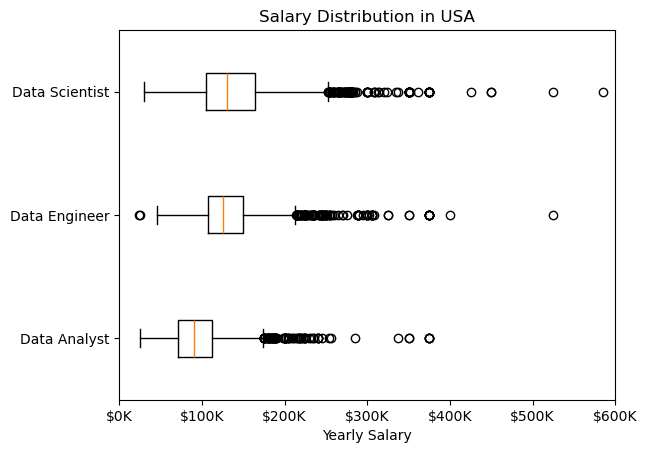

In [18]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_DA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_DA = df_DA.dropna(subset=['salary_year_avg'])

job_list = [df_DA[df_DA['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in USA')
plt.xlabel('Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [10]:
df_DA['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64